# *αβ* and *dq* transforms

Playground for testing voltage/current transforms. Test the **imbalanced case**.

PH, May 2015


## αβ (Clarke) transform

References:

* Zhong &  Hornik (different sign convention)
* http://en.wikipedia.org/wiki/Alpha%E2%80%93beta_transformation


$$ i_{{\alpha \beta }}(t)={\frac 23}{\begin{bmatrix}1&-{\frac 12}&-{\frac 12}\\0&{\frac {{\sqrt {3}}}{2}}&-{\frac {{\sqrt {3}}}{2}}\end{bmatrix}}{\begin{bmatrix}i_{a}(t)\\i_{b}(t)\\i_{c}(t)\end{bmatrix}} $$



In [1]:
import sympy
from sympy import symbols, simplify, Matrix, sqrt, Rational
from sympy import pi, cos, sin, exp

In [2]:
sympy.init_printing()

The transformation matrix

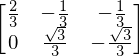

In [9]:
half = Rational(1,2)
T = Rational(2,3) * Matrix(
    [[1, -half, -half],
     [0, sqrt(3)*half, -sqrt(3)*half]])
T

### Balanced phases

In [11]:
th = symbols('theta', real=True)

In [36]:
ia = cos(th)
ib = cos(th-2*pi/3)
ic = cos(th-4*pi/3)
ia, ib, ic

*phase shifted signals*

In [ ]:
ia = sin(th)
ib = sin(th-2*pi/3)
ic = sin(th-4*pi/3)
ia, ib, ic

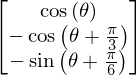

In [37]:
iabc = Matrix([ia, ib, ic])
iabc

Check that we indeed get a rotating vector

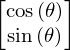

In [38]:
simplify(T*iabc)

###  Variation: Clarke transform using Complex numbers

Space vector, as a complex number:

$$ V_s = 2/3 (v_a + a v_b + a^2 v_c)$$

with $a = e^{j2\pi/3}$, i.e. a +120° rotation.

This space vector should be the same as $v_\alpha + j v_\beta$

In [15]:
j = sympy.I
a = exp(2*j*pi/3)

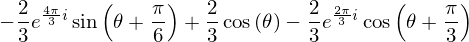

In [21]:
V_s = Rational(2,3)* (ia + ib*a + ic*a**2)
V_s 

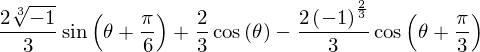

In [22]:
simplify(V_s) # this simplify doesn't work :-(

Apply the simplification on the real and the imag part separately

In [23]:
simplify(sympy.re(V_s))

In [24]:
simplify(sympy.im(V_s))

Conclusion: it works, we indeed have $V_s = \cos(\theta) + j \sin(\theta) = e^{j\theta}$ 

### Grid disturbances

#### 1) Measurement offsets

If the offsets on phase are equal, there is no effect on the *αβ* components. This is because $1 + a + a^2 = \underline{0}$. 

(If offsets are different, we get a fixed perturbation°

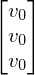

In [25]:
v0 = symbols('v_0')
iabc_off = Matrix([v0, v0, v0])
iabc_off

In [26]:
T*iabc_off

#### 2) Voltage imbalance

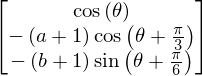

In [34]:
a,b = symbols('a b')

ia_imb = cos(th)
ib_imb = (1+a)*cos(th-2*pi/3)
ic_imb = (1+b)*cos(th-4*pi/3)

iabc_imb = Matrix([ia_imb, ib_imb, ic_imb])
iabc_imb

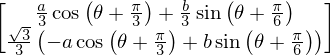

In [39]:
simplify(T*iabc_imb - T*iabc)

This seems to create pulsations along lines:

* in the (1, -sqrt(3)) direction (- 60° ?) for a
* in the (1, +sqrt(3)) direction (+ 60° ?) for b

Question: how does this translate on the angle error ?

#### Harmonics

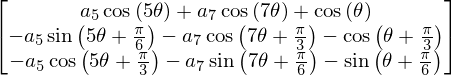

In [41]:
a5, a7 = symbols('a_5 a_7')

ia_har = cos(th) + a5*cos(5*th) + a7*cos(7*th)
ib_har = cos(th-2*pi/3) + a5*cos(5*(th-2*pi/3)) + a7*cos(7*(th-2*pi/3))
ic_har = cos(th-4*pi/3) + a5*cos(5*(th-4*pi/3)) + a7*cos(7*(th-4*pi/3))

iabc_har = Matrix([ia_har, ib_har, ic_har])
iabc_har

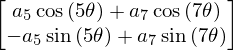

In [42]:
simplify(T*iabc_har - T*iabc)

Observation:

* the 5th harmonics creates a rotating component at $-5\omega$ speed
* the 7th harmonics creates a rotating component at $+7\omega$ speed

## Plots with unbalanced grid

In [44]:
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


abc signals

In [107]:
def abc_signal(a=0., b=0.):
    th = np.linspace(0, 2*pi, 12*10+1) # points every 3 degrees

    ia = np.cos(th)
    ib = (1+a)*np.cos(th-2*pi/3)
    ic = (1+b)*np.cos(th-4*pi/3)

    iabc = np.vstack((ia,ib,ic))
    return th, iabc

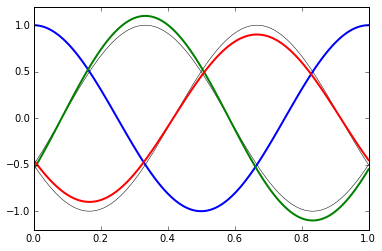

In [183]:
@interact(a=[-0.2, 0.2, 0.01], b=[-0.2, 0.2, 0.01])
def plot_spacevec(a=0.,b=0.):
    th, iabc = abc_signal(a,b)
    ia, ib, ic = iabc
    
    iabc_ref = abc_signal()[1]
    
    plt.plot(th/(2*pi), iabc_ref.T, 'k-', lw=0.5)
    plt.plot(th/(2*pi), ia, 'b-', lw=2)
    plt.plot(th/(2*pi), ib, 'g-', lw=2)
    plt.plot(th/(2*pi), ic, 'r-', lw=2)
   
    plt.ylim(-1.2, 1.2)

alpha beta transform

In [185]:
T = 2./3 * np.array(
    [[1, -0.5, -0.5],
     [0, np.sqrt(3)/2, -np.sqrt(3)/2]])
T

def abc2albet(i_abc):
    i_albet = np.dot(T, i_abc)
    return i_albet

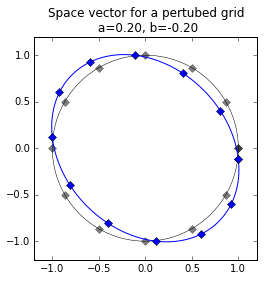

In [186]:
@interact(a=[-0.2, 0.2, 0.01], b=[-0.2, 0.2, 0.01])
def plot_spacevec(a=0.,b=0.):
    th, iabc = abc_signal(a,b)
    ialpha, ibeta = abc2albet(iabc)
    ialpha_ref, ibeta_ref = abc2albet(abc_signal()[1])
    
    fig = plt.figure()
    title='Space vector for a pertubed grid \n a={:.2f}, b={:.2f}'.format(a,b)
    ax = fig.add_subplot(111, aspect='equal', title=title)
    
    plt.plot(ialpha_ref, ibeta_ref, 'k-', lw=0.5);
    plt.plot(ialpha_ref[::10], ibeta_ref[::10], 'kD', alpha=0.5);
    
    plt.plot(ialpha, ibeta, 'b-');
    plt.plot(ialpha[::10], ibeta[::10], 'bD');
    
    ax.set(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2))

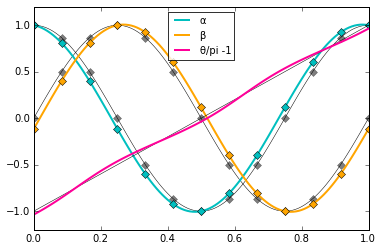

In [188]:
@interact(a=[-0.2, 0.2, 0.01], b=[-0.2, 0.2, 0.01])
def plot_albet(a=0.,b=0.):
    th, iabc = abc_signal(a,b)
    ialpha, ibeta = abc2albet(iabc)
    ialbet_ref = abc2albet(abc_signal()[1])
    
    x = th/(2*pi)
    plt.plot(x, ialbet_ref.T, 'k-', lw=0.5)
    plt.plot(x[::10], ialbet_ref.T[::10], 'kD', alpha=0.5)
    
    plt.plot(x, ialpha, '-', label=u'α',
             lw=2, color='c')
    plt.plot(x, ibeta,  '-', label=u'β',
             lw=2, color='orange')
    plt.plot(x[::10], ialpha[::10], 'D', color='c')
    plt.plot(x[::10], ibeta[::10],  'D', color='orange')
    
    # Plot the angle
    th_estim = np.arctan2(ibeta, ialpha)
    th_estim = np.unwrap(th_estim)
    
    plt.plot(x, th/pi-1, 'k-', lw=0.5)
    plt.plot(x, th_estim/pi-1, label=u'θ/pi -1', lw=2, color='#FF0099')
    
    plt.legend(loc='upper center', framealpha=0.8)
    
    plt.ylim(-1.2, 1.2)

Observation: there seems to be a $2 \omega$ perturbation on the angle

Theoretical deviation, from Typhoon GCC practicum:

$$e \approx \frac{a+b}{6} \sin 2\theta + \frac{b-a}{2\sqrt{3}} \cos 2\theta$$

Graphical verification:

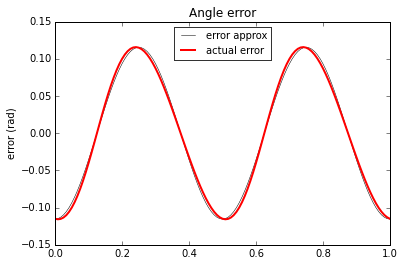

In [200]:
@interact(a=[-0.2, 0.2, 0.01], b=[-0.2, 0.2, 0.01])
def plot_angle_error(a=0.,b=0.):
    th, iabc = abc_signal(a,b)
    ialpha, ibeta = abc2albet(iabc)
    
    th_estim = np.arctan2(ibeta, ialpha)
    th_estim = np.unwrap(th_estim)
    
    th_err = th_estim - th
    th_err_approx = (a+b)/6. * np.sin(2*th) + (b-a)/(2*np.sqrt(3)) * np.cos(2*th)
    
    x = th/(2*pi)
    plt.plot(x, th_err_approx, 'k-', lw=0.5, label='error approx')
    plt.plot(x, th_err, 'r-', lw=2, label='actual error')
    
    plt.legend(loc='upper center', framealpha=0.8)
    plt.ylim(-0.15, 0.15)
    plt.title('Angle error')
    plt.ylabel('error (rad)')

Observation: approx is fine for b-a term, a bit too big for the a+b term